# `mlarena.utils.plot_utils` Demo

This notebook serves as a demonstration of the various plotting utilities available in the `mlarena.utils.plot_utils` module. 

In [1]:
import mlarena.utils.plot_utils as put
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. boxplot_scatter_overlay()

The `boxplot_scatter_overlay()` function creates a boxplot overlaid with scatter points, providing a detailed view of data distribution and outliers. 

It is useful for visualizing the spread, central tendency, and outliers of data across categories, especially when dealing with dense or overlapping data points.

In the demo below, you will see two examples: one with sparse data, and the another with more dense data, demonstrating how the function handles crowded datasets effectively.

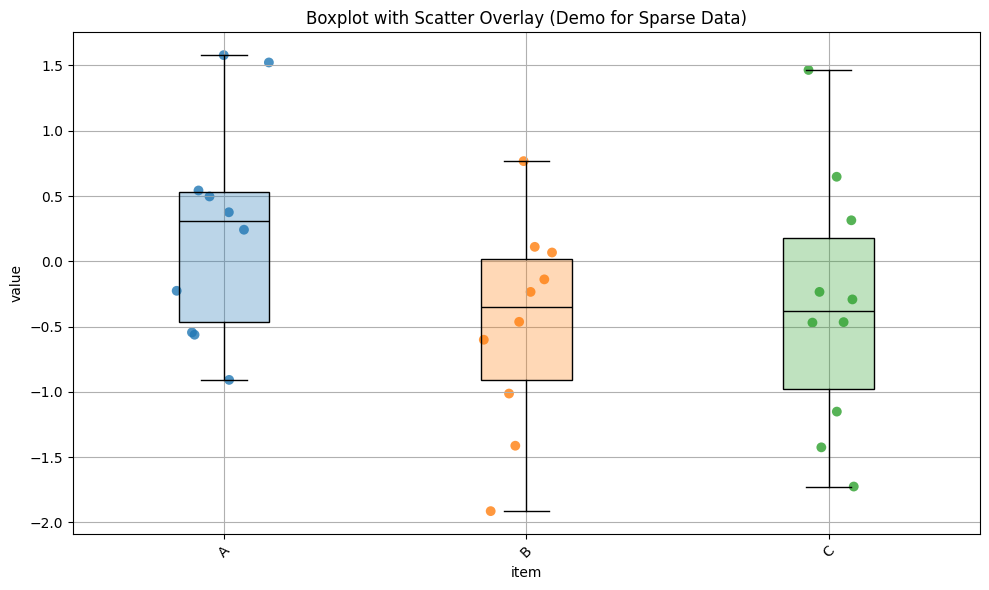

In [2]:
# Create synthetic data that is sparse
np.random.seed(42)
data = {
    "item": ["A", "B", "C"] * 10,
    "value": np.random.randn(30),
}
df = pd.DataFrame(data)
# Create boxplot with scatter overlay
fig, ax, summary_table = put.boxplot_scatter_overlay(
    data=df,
    x="item",
    y="value",
    title="Boxplot with Scatter Overlay (Demo for Sparse Data)",
    return_summary=True #return the summary stats, default to be False
)

In [3]:
summary_table

,item,n,mean,median,sd
0,A,10,0.251871,0.308830,0.843797
1,B,10,-0.482900,-0.348786,0.789123
2,C,10,-0.333411,-0.378712,0.969651


Below is an example of a denser dataset. You can adjust the `dot_size` parameter to customize the visualization to your preference.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Boxplot with Scatter Overlay (Demo for Crowded Data)'}, xlabel='item', ylabel='value'>)

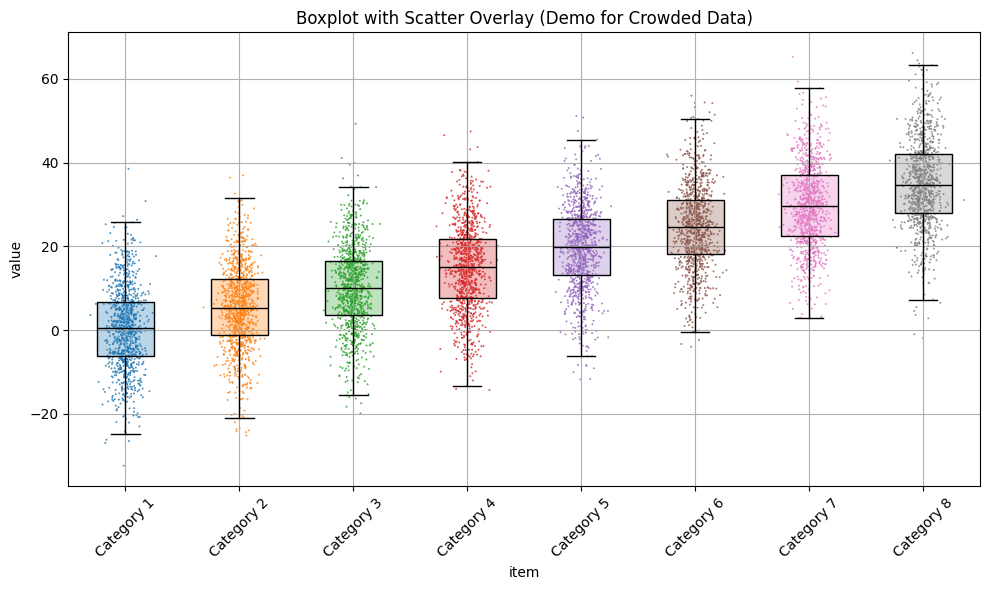

In [4]:
# Create synthetic data that is crowded
num_categories = 8
num_points_per_category = 1000
categories = [f"Category {i + 1}" for i in range(num_categories)]
values = np.concatenate(
    [
        np.random.normal(loc=i * 5, scale=10, size=num_points_per_category)
        for i in range(num_categories)
    ]
)
df_synthetic = pd.DataFrame(
    {"item": np.repeat(categories, num_points_per_category), "value": values}
)
# Create boxplot with scatter overlay
put.boxplot_scatter_overlay(
    data=df_synthetic,
    x="item",
    y="value",
    title="Boxplot with Scatter Overlay (Demo for Crowded Data)",
    dot_size=2,
    )

## 2. plot_medical_timeseries()

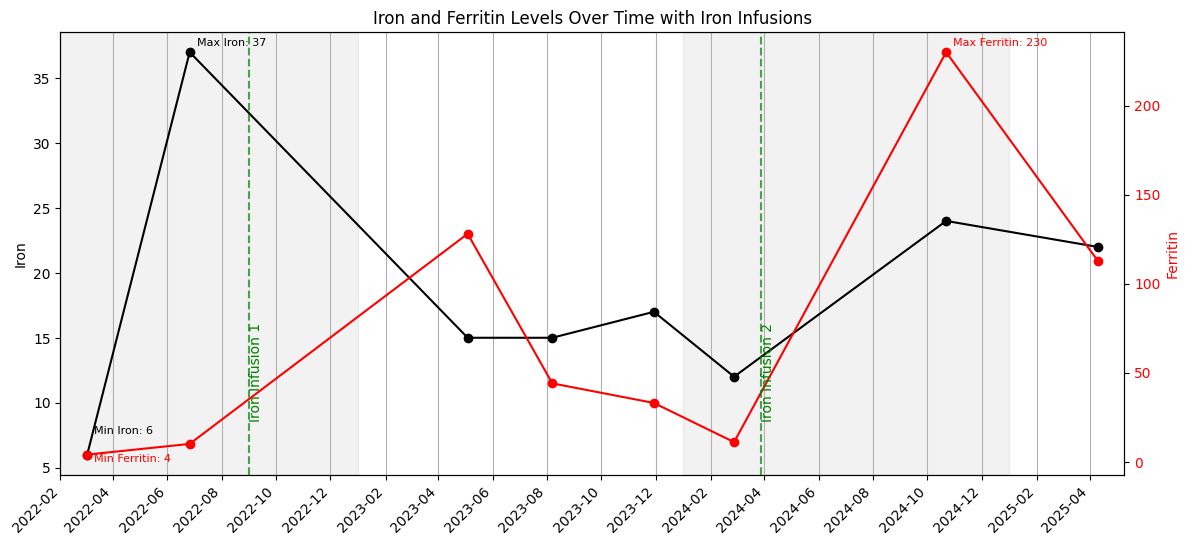

In [5]:
# Example usage:
data = pd.DataFrame(
    {
        "date": [
            "2022-03-03",
            "2022-06-26",
            "2023-05-04",
            "2023-08-07",
            "2023-11-29",
            "2024-02-27",
            "2024-10-22",
            "2025-04-10",
        ],
        "iron": [6, 37, 15, 15, 17, 12, 24, 22],
        "ferritin": [4, 10, 128, 44, 33, 11, 230, 113],
    }
)

metrics = {
    "Iron": {
        "values": "iron",
        #  "color": "blue" 
    },
    "Ferritin": {
        "values": "ferritin",
        #  "color": "darkred" 
    },
}

treatments = {"Iron Infusion": ["2022-09-01", "2024-03-28"]}

fig, axes = put.plot_medical_timeseries(
    data=data,
    date_col="date",
    metrics=metrics,
    treatment_dates=treatments,
    title="Iron and Ferritin Levels Over Time with Iron Infusions",
)
plt.show()

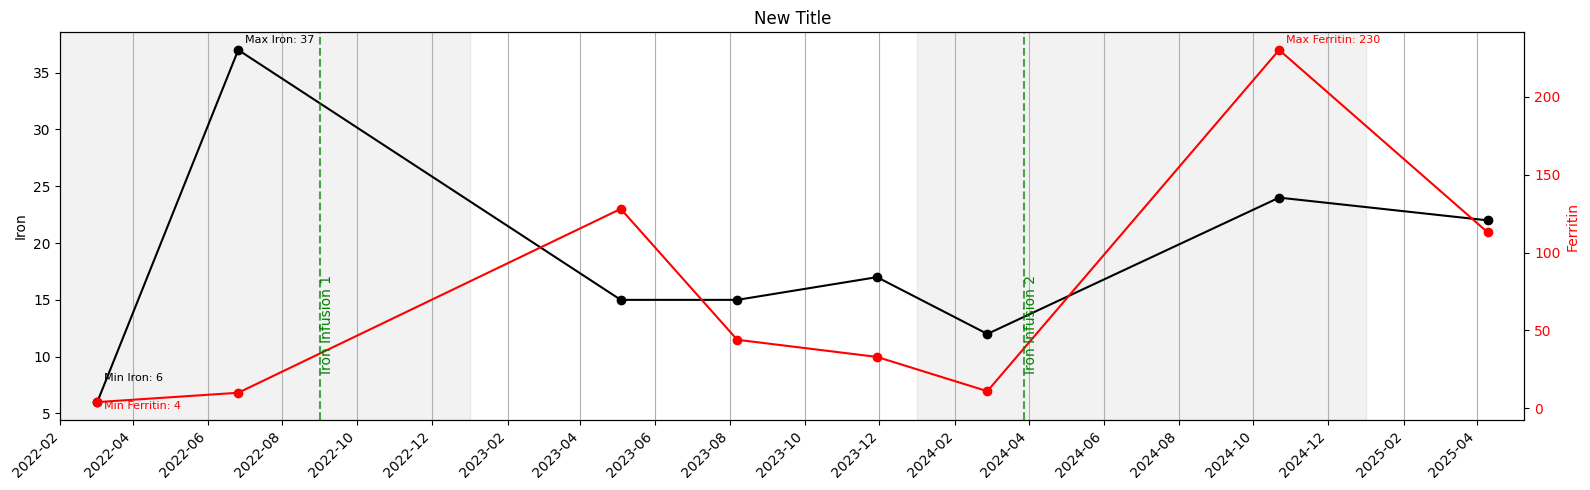

In [6]:
# further customize the figure if desired
fig, axes = put.plot_medical_timeseries(
    data=data,
    date_col="date",
    metrics=metrics,
    treatment_dates=treatments,
    title = "Iron and Ferritin Levels Over Time with Iron Infusions"
)

axes[1].set_title("New Title")
fig.set_size_inches(16, 5)
fig.tight_layout()
# fig.savefig('medical_plot.png', dpi=300, bbox_inches='tight')
plt.show() 


## 3. plot_stacked_bar_over_time()

In [7]:
# Create synthetic data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="ME")
categories = ['Yes', 'No']
data = []

for date in dates:
    n = np.random.randint(50, 150)
    for _ in range(n):
        data.append({
            'end_date': date,
            'isFraud': np.random.choice(categories, p=[0.3, 0.7])  # 30% fraud, 70% not
        })

# Convert to DataFrame
df_synthetic = pd.DataFrame(data)

# Preview
print(df_synthetic.head())

    end_date isFraud
0 2023-01-31      No
1 2023-01-31      No
2 2023-01-31      No
3 2023-01-31     Yes
4 2023-01-31     Yes


### 3.1 Stacked bar showing percentage

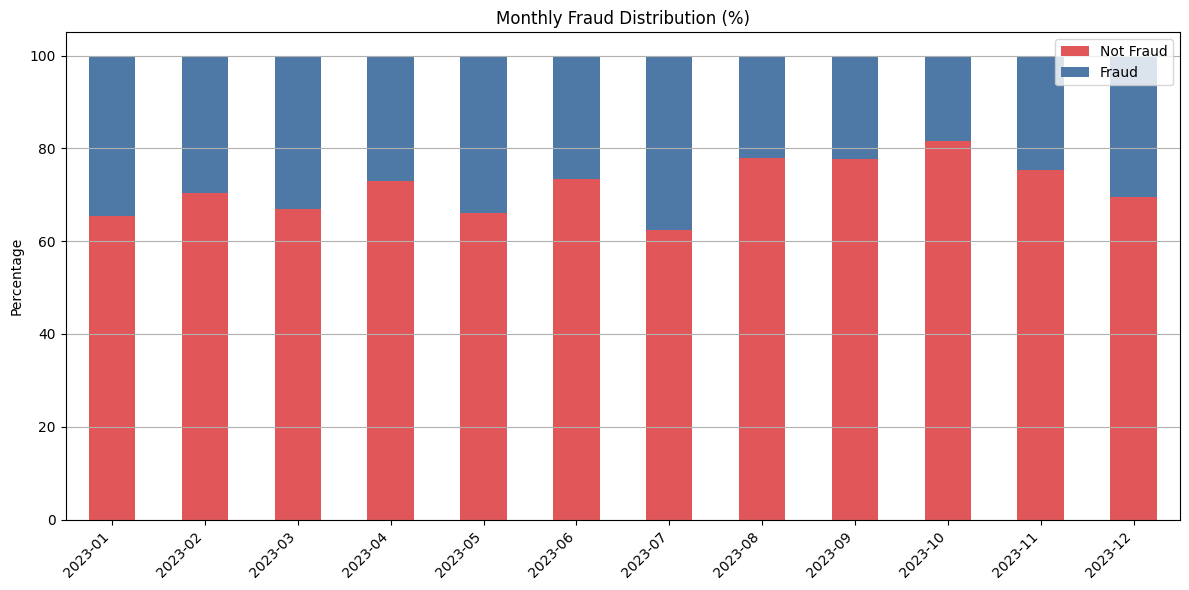

In [8]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=True,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (%)',
    xlabel='',
    color_palette=['#E15759', '#4E79A7'] # CoralRed, SteelBlue
)
plt.show()

### 3.2 Stached bar showing actual counts

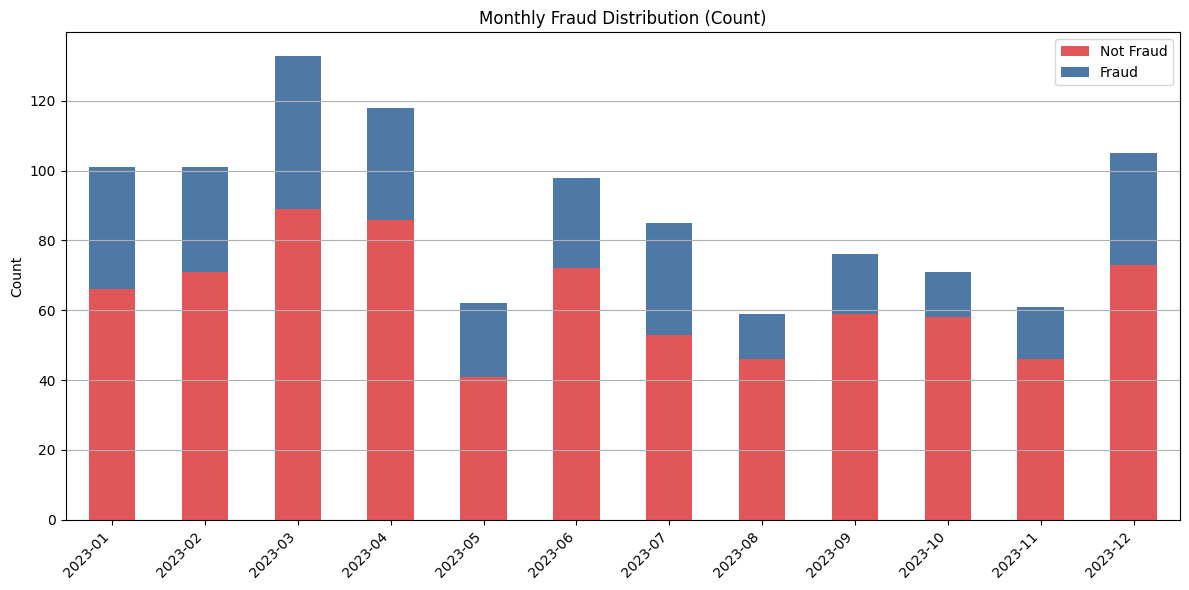

In [9]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=False,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (Count)',
    xlabel='',
    color_palette=['#E15759', '#4E79A7'] 
)

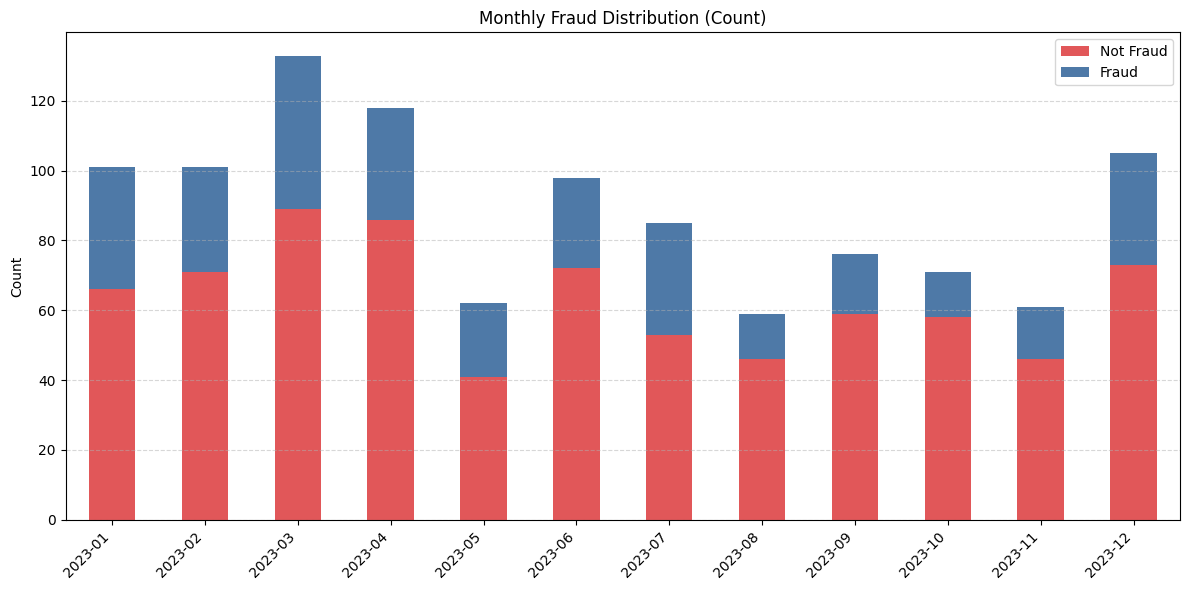

In [10]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=False,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (Count)',
    xlabel='',
    color_palette=['#E15759', '#4E79A7'] 
)

# Customize grid style to be dashed with alpha
ax.grid(True, axis="y", linestyle='--', alpha=0.5)

### 3.3 Set time gratularity to the hour

Use the `freq` parameter to determine the time gratularity for the plot: 
- 'H'=hour
- 'D'=day
- 'M'=month
- 'Y'=year

In [11]:
# Define activity patterns
activity_patterns = {
    'business': {
        'hours': (9, 17),
        'activities': ['Work', 'Meeting', 'Break'],
        'probs': [0.6, 0.3, 0.1]
    },
    'evening': {
        'hours': (18, 22),
        'activities': ['Leisure', 'Dinner', 'Exercise'],
        'probs': [0.5, 0.3, 0.2]
    },
    'night': {
        'hours': (0, 8),
        'activities': ['Sleep', 'Reading', 'Other'],
        'probs': [0.7, 0.2, 0.1]
    }
}

# Generate data
dates = pd.date_range(start='2024-01-01', end='2024-01-01 23:00:00', freq='h')
n_points = len(dates)

# Generate activities
all_activities = []
all_timestamps = []

for hour in dates:
    current_hour = hour.hour
    
    # Determine pattern based on hour
    pattern = next(
        (p for p in activity_patterns.values() 
         if p['hours'][0] <= current_hour <= p['hours'][1]),
        activity_patterns['night']  # default to night pattern
    )
    
    # More activities during business hours, fewer at night
    if 9 <= current_hour <= 17:
        activities_per_hour = np.random.randint(15, 25)  # Busy during work hours
    elif 18 <= current_hour <= 22:
        activities_per_hour = np.random.randint(8, 15)   # Moderate evening activity
    else:
        activities_per_hour = np.random.randint(3, 8)    # Fewer activities at night
    
    # Generate multiple activities for this hour
    hour_activities = np.random.choice(
        pattern['activities'],
        size=activities_per_hour,
        p=pattern['probs']
    )
    
    all_activities.extend(hour_activities)
    all_timestamps.extend([hour] * activities_per_hour)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': all_timestamps,
    'activity': all_activities
})

print(df['activity'].value_counts())

activity
Work        91
Meeting     54
Sleep       38
Leisure     27
Dinner      22
Break       16
Reading      8
Other        7
Exercise     7
Name: count, dtype: int64


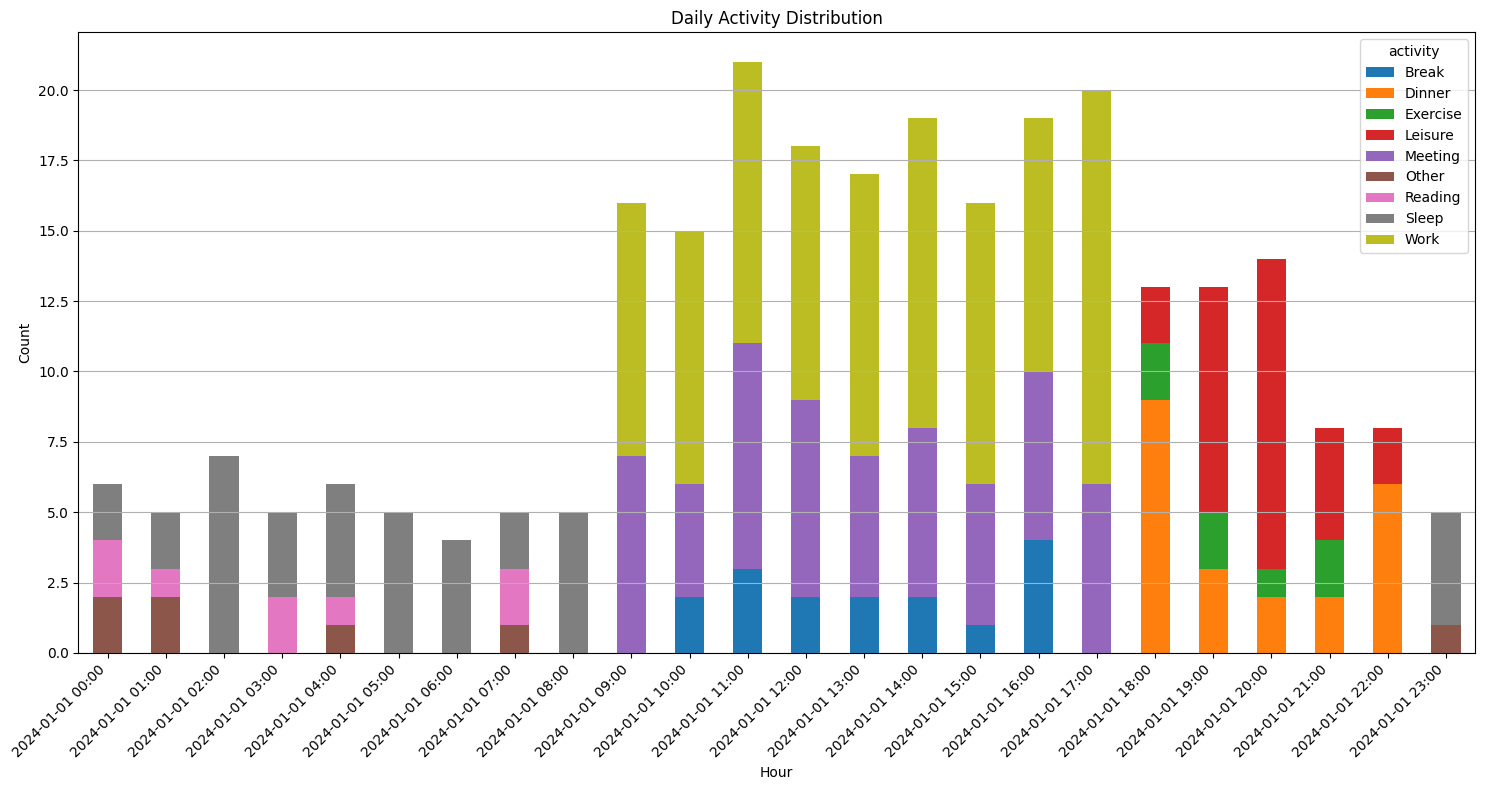

In [12]:
fig, ax = put.plot_stacked_bar_over_time(
    data = df,
    x = 'timestamp',
    y='activity',
    freq='h',
    title='Daily Activity Distribution',
    is_pct=False,
    figsize = (15,8)
)


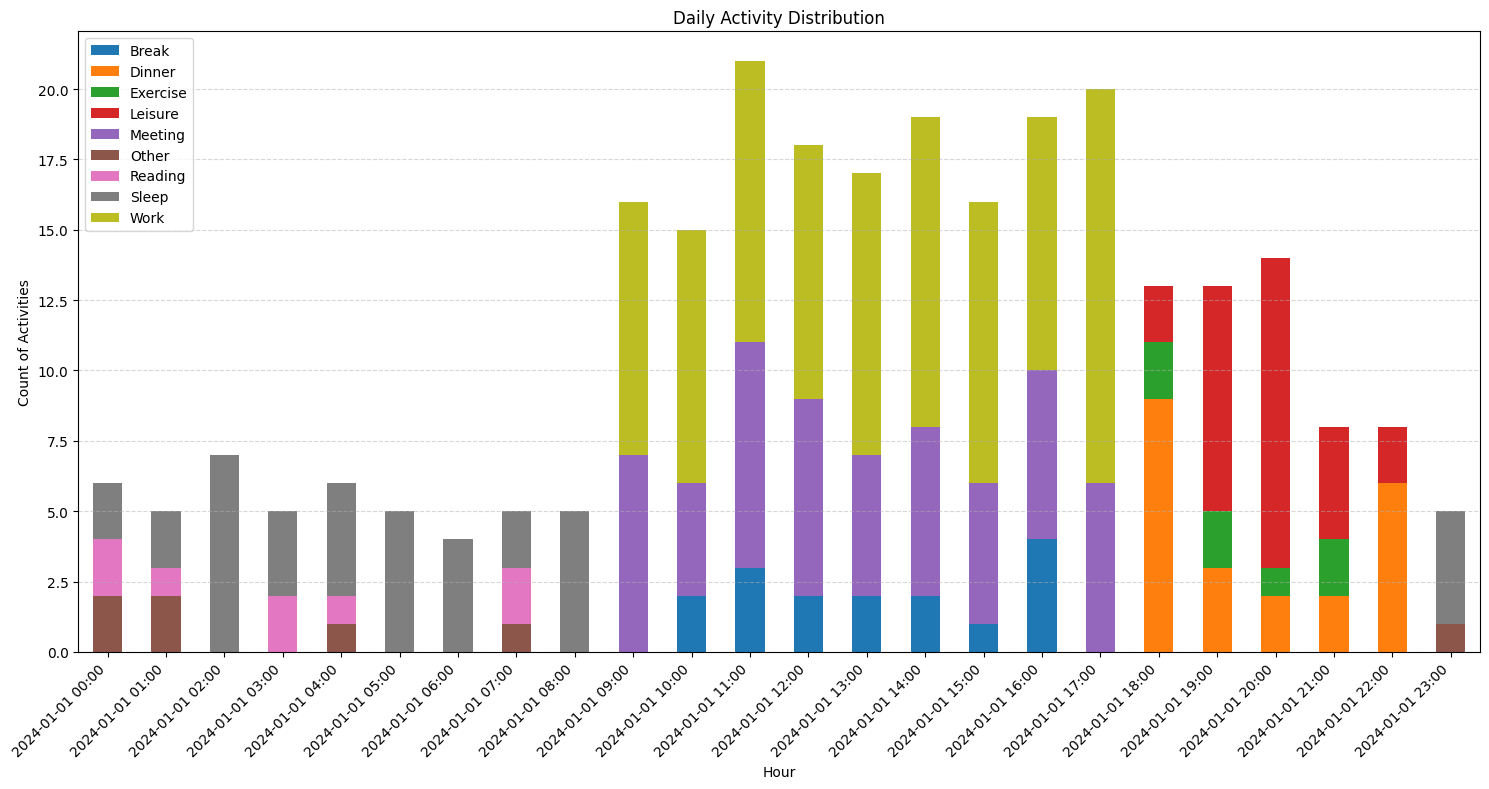

In [14]:
fig, ax = put.plot_stacked_bar_over_time(
    data = df,
    x = 'timestamp',
    y='activity',
    freq='h',
    title='Daily Activity Distribution',
    is_pct=False,
    figsize = (15,8)
)
# cutsomize to our hearts content :) 
ax.legend(loc='upper left')
ax.set_ylabel('Count of Activities')
ax.grid(True, axis="y", linestyle='--', alpha=0.5)
plt.tight_layout()